# Getting Started with Qiskit


A basic workflow in designing in a quantum program to solve a problem consists of four steps: 

1.  If applicable, map the problem you want to solve to a quantum-native format (qubits)

2.  Build the circuit that solves the problem

3.  Execute the circuit on a chosen backend

4.  Analyze the results



In [1]:
import numpy as np
from qiskit import *

## Circuit Basics <a name='basics'></a>


### Building the circuit

The basic element needed for your first program is the QuantumCircuit.  We begin by creating a `QuantumCircuit` comprised of two qubits.

In [18]:
# Create a Quantum Circuit with 2 qubits 
circuit = QuantumCircuit(4)

After you create the circuit with its registers, you can add gates (unitary operations) to manipulate the qubits. As you proceed through the tutorials you will find more gates and circuits; below is an example of a quantum circuit that makes a two-qubit Bell (EPR) state

$$|\psi\rangle = \left(|00\rangle-|11\rangle\right)/\sqrt{2}.$$

To create such a state, we start with a two-qubit quantum register. By default, each qubit in the register is initialized to $|0\rangle$. To make the Bell state, we apply the following gates:
- A Hadamard gate $H$ on qubit 0, which puts it into the superposition state $\left(|0\rangle+|1\rangle\right)/\sqrt{2}$.
- A controlled-Not operation ($C{X}$ or $C{NOT}$) between qubit 0 and qubit 1.
- A Z gate on qubit 1.

On an ideal quantum computer, the state produced by running this circuit would be the Bell state above.

In Qiskit, operations can be added to the circuit one by one, as shown below.

In [25]:
# Add a H gate on qubit #0
circuit.h(0)

# Add a CX (CNOT) gate with control qubit #0 and target qubit #1
circuit.cx(0, 1)
circuit.cx(0, 2)
circuit.cx(0, 3)
# Add a Z gate on qubit #1
circuit.z(1)

## Visualize Circuit <a name='visualize'></a>

You can visualize your circuit using Qiskit `"circuit_name".draw()`, which plots the circuit in the form found in many textbooks.

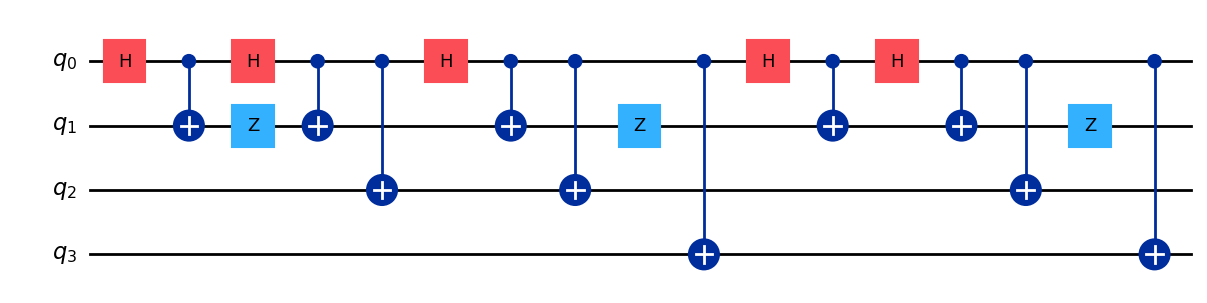

In [26]:
# Draw the circuit
circuit.draw(output='mpl')

<div class="alert alert-block alert-info">

Reminder: Qiskit SDK uses the "LSb 0 bit numbering" where the least significant bit (LSb) is on the right while the most significant bit is on the left.

Consequence: when representing the state of a multi-qubit system, the tensor order used in Qiskit is different than that used in most physics textbooks. Suppose there are $n$ qubits, and qubit $j$ is labeled as $Q_{j}$. Qiskit uses an ordering in which the $n^{\mathrm{th}}$ qubit is on the <em><strong>left</strong></em> side of the tensor product, so that the basis vectors are labeled as  $Q_{n-1}\otimes \cdots  \otimes  Q_1\otimes Q_0$.

For example, if qubit zero is in state |0>, qubit 1 is in state |0>, and qubit 2 is in state |1>, Qiskit would represent this state as $|100\rangle$, whereas many physics textbooks would represent it as $|001\rangle$.

This difference in labeling affects the way multi-qubit operations are represented as matrices. For example, Qiskit represents a controlled-X ($C_{X}$) operation with qubit 0 being the control and qubit 1 being the target as

$$C_X = \begin{pmatrix} 1 & 0 & 0 & 0 \\  0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\\end{pmatrix}.$$

 

In the circuit representation, the 0-th qubit (left) is at the top and the n-th qubit (right) is at the bottom.
</div>

In the circuit above, the qubits are put in order, with qubit #0 at the top and qubit #1 at the bottom. The circuit is read left to right (meaning that gates that are applied earlier in the circuit show up further to the left).

## Simulating circuits using Qiskit Aer <a name='simulation'></a>

Qiskit Aer is our package for simulating quantum circuits on classical computers. It provides many different backends for doing a simulation. 

For example:

The`StatevectorSimulator()` backend returns the quantum state. 

The `UnitarySimulator()` backend returns matrix representing the succession of gates in the circuit (note that it is very memory-intensive!).

The `QasmSimulator()` backend allows one to do measurements and simulates an actual quantum computation. Noise can also be included.

The  `AerSimulator()` backend allows to do all of the above and the chosen purpose can be configured by setting (method='statevector' etc...)



## Example: `StatevectorSimulator()` backend

In [5]:
# Note: you may need to first install qiskit-aer (e.g. with 'pip install qiskit-aer')

from qiskit_aer import StatevectorSimulator
backend = StatevectorSimulator()

Now that we have chosen the backend, it's time to compile and run the quantum circuit. Qiskit provides the `run` function for this. ``run`` returns a ``job`` object that encapsulates information about the job submitted to the backend.

In [6]:
# compile the circuit down to low-level StatevectorSimulator instructions supported by the backend (not needed for simple circuits)
compiled_circuit = transpile(circuit, backend)

# Execute the program 
job = backend.run(compiled_circuit)

When you run a program, a job object is made that has the following two useful methods: 
`job.status()` and `job.result()`, which return the status of the job and a result object, respectively.

In [7]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

In [8]:
result = job.result()

The result object contains the data and Qiskit provides the method 
`result.get_statevector(circuit)` to return the state vector for the quantum circuit.

In [9]:
outputstate = result.get_statevector(compiled_circuit, decimals=8)
print(outputstate)

Statevector([ 0.70710678+0.j,  0.        +0.j, -0.        +0.j,
             -0.70710678+0.j],
            dims=(2, 2))


In [10]:
outputstate.draw(output='latex')

<IPython.core.display.Latex object>

## Example: `UnitarySimulator()` backend

In [11]:
from qiskit_aer import UnitarySimulator
backend = UnitarySimulator()
job = backend.run(circuit)
result = job.result()
unitary_mat = result.get_unitary(circuit,decimals=4)
print(unitary_mat)

Operator([[ 0.7071+0.j,  0.7071-0.j,  0.    +0.j,  0.    +0.j],
          [ 0.    +0.j,  0.    +0.j,  0.7071+0.j, -0.7071+0.j],
          [-0.    +0.j, -0.    +0.j, -0.7071+0.j, -0.7071+0.j],
          [-0.7071+0.j,  0.7071-0.j, -0.    +0.j, -0.    +0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


## Example: Measuring with ` QasmSimulator()` backend

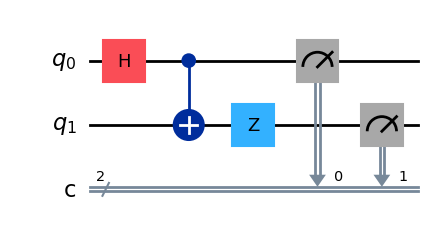

In [12]:
# Create a Quantum Circuit with 2 qubits and 2 classical bits (to map the measurement results)
circuitb = QuantumCircuit(2,2)

#### ---

# reconstruct the previous circuit creating the Bell state:
# circuitb.h(0)
# circuitb.cx(0, 1)
# circuitb.z(1) 

# or, more compactly:
circuitb = circuitb.compose(circuit, range(0, 2))

#### --- 

# Measure and Map the quantum measurement to the classical bits
circuitb.measure([0,1], [0,1])

# Draw the circuit
circuitb.draw(output='mpl')

In [13]:
# We'll run the program on the QasmSimulator

from qiskit_aer import QasmSimulator
backend = QasmSimulator()

### You can also use the AerSimulator:
# from qiskit_aer import AerSimulator
# backend = AerSimulator(method='automatic')

In [14]:
# compile the circuit down to low-level QasmSimulator instructions supported by the backend 
compiled_circuit = transpile(circuitb, backend)

# Execute the circuit on the QasmSimulator
nshots = 1000
job = backend.run(compiled_circuit, shots = nshots)

# Grab measurement results from the job
result = job.result()

Once you have a result object, you can access the counts via the function `get_counts(circuit)`. This gives you the _aggregated_ binary outcomes of the circuit you submitted.

In [15]:
# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:",counts)


Total count for 00 and 11 are: {'11': 481, '00': 519}


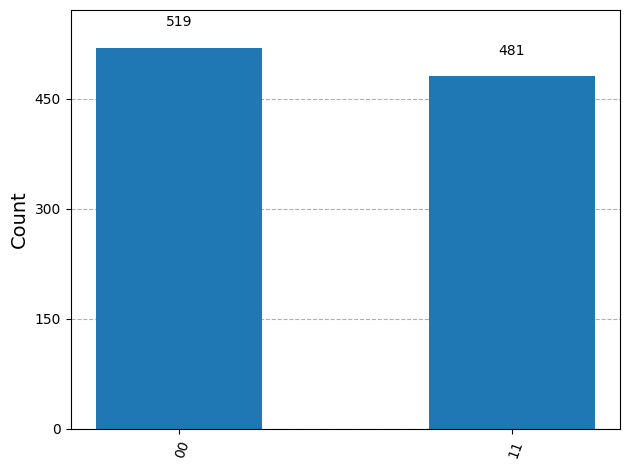

In [16]:
from qiskit.visualization import plot_histogram
# Plot a histogram
plot_histogram(counts)

The estimated outcome probabilities $\mathrm{Pr}(00)$ and  $\mathrm{Pr}(11)$ are computed by taking the aggregate counts and dividing by the number of shots (times the circuit was repeated). Try changing the ``shots`` keyword in the ``run`` function and see how the estimated probabilities change.

In [17]:
Pr_00 = counts['00']/nshots
Pr_11 = counts['11']/nshots

print("Probability of Result 00 =", Pr_00 * 100, '%')
print("Probability of Result 11 =", Pr_11 * 100, '%')

Probability of Result 00 = 51.9 %
Probability of Result 11 = 48.1 %


## Try it yourself: construct a circuit that creates a GHZ state and measures the qubits

Construct the circuit that creates the following GHZ state:

$$|GHZ\rangle = \left(|000\rangle+|111\rangle\right)/\sqrt{2} \; ,$$

and measures the three qubits.

Execute it on the `QasmSimulator()` backend.